In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# scikit-learn modules
from sklearn.model_selection import train_test_split # for splitting the data
from sklearn.metrics import mean_squared_error # for calculating the cost function
from sklearn.tree import DecisionTreeRegressor # for building the model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Initializing the Decision Tree Regression model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [2]:
# load data
df_clean = pd.read_csv("MLreadydata.csv")

In [3]:
y = np.log(df_clean['price'])  # Zielvariable ist log(price)
X = df_clean.drop(columns=['price', 'description'])  # Features


In [4]:
# Erst: Train + Temp (Test+Val)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42
)  # 70% Train, 30% Temp

# Danach: Temp in Validation + Test aufteilen
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)  # 15% Val, 15% Test

In [5]:
X_train.head()

host_response_rate  host_acceptance_rate  host_is_superhost  \
3861               100.0                  96.0                0.0   
2458               100.0                 100.0                0.0   
1729               100.0                 100.0                0.0   
226                100.0                  92.0                1.0   
3876               100.0                 100.0                0.0   

      host_listings_count  host_total_listings_count  host_has_profile_pic  \
3861                  8.0                       14.0                   1.0   
2458                184.0                      256.0                   1.0   
1729                 73.0                      154.0                   1.0   
226                   1.0                        1.0                   1.0   
3876                  8.0                        8.0                   1.0   

      host_identity_verified   latitude  longitude  accommodates  bathrooms  \
3861                     0.0  40.621433  22.954289           4.0        1.0   
2458                     1.0  40.636620  22.937210           2.0        1.0   
1729                     1.0  40.642220  22.935820           3.0        1.0   
226                      1.0  40.642500  22.951260           3.0        1.0   
3876                     1.0  40.643879  22.933387           4.0        1.0   

      bedrooms  beds  minimum_nights  maximum_nights  minimum_minimum_nights  \
3861       1.0   1.0             1.0           365.0                     1.0   
2458       0.0   1.0             1.0           365.0                     2.0   
1729       1.0   1.0             1.0          1125.0                     1.0   
226        1.0   1.0             3.0          1125.0                     3.0   
3876       1.0   2.0             1.0           365.0                     1.0   

      maximum_minimum_nights  minimum_maximum_nights  maximum_maximum_nights  \
3861                     1.0                   365.0                   365.0   
2458                     2.0                   365.0                   365.0   
1729                     2.0                  1125.0                  1125.0   
226                      3.0                  1125.0                  1125.0   
3876                     1.0                  1125.0                  1125.0   

      minimum_nights_avg_ntm  maximum_nights_avg_ntm  has_availability  \
3861                     1.0                   365.0               1.0   
2458                     2.0                   365.0               1.0   
1729                     1.6                  1125.0               1.0   
226                      3.0                  1125.0               1.0   
3876                     1.0                  1125.0               1.0   

      availability_30  availability_60  availability_90  availability_365  \
3861             23.0             49.0             79.0             353.0   
2458             14.0             23.0             48.0             301.0   
1729             15.0             38.0             68.0             169.0   
226               0.0              1.0             21.0             124.0   
3876             11.0             37.0             50.0             277.0   

      number_of_reviews  number_of_reviews_ltm  number_of_reviews_l30d  \
3861                1.0                    1.0                     0.0   
2458                6.0                    6.0                     0.0   
1729                6.0                    2.0                     0.0   
226                61.0                   17.0                     0.0   
3876                2.0                    2.0                     0.0   

      availability_eoy  number_of_reviews_ly  estimated_occupancy_l365d  \
3861             277.0                   1.0                        6.0   
2458             225.0                   6.0                       36.0   
1729             169.0                   2.0                       12.0   
226              124.0          

# 1.1 Baseline ohne parameter testen und alle features


Modell: Decision Tree
Log-R²: -0.2829 | Preis-R²: -0.8456
Log-MAE: 0.3293 | Preis-MAE: 30.20
Log-MSE: 0.2626 | Preis-MSE: 8897.26

Modell: Random Forest
Log-R²: 0.4034 | Preis-R²: 0.1072
Log-MAE: 0.2197 | Preis-MAE: 18.19
Log-MSE: 0.1221 | Preis-MSE: 4303.94

Modell: XGBoost
Log-R²: 0.4233 | Preis-R²: 0.1473
Log-MAE: 0.2175 | Preis-MAE: 17.98
Log-MSE: 0.1181 | Preis-MSE: 4110.59

Modell: Linear Regression
Log-R²: -0.0689 | Preis-R²: -1.1906
Log-MAE: 0.3017 | Preis-MAE: 27.80
Log-MSE: 0.2188 | Preis-MSE: 10560.91


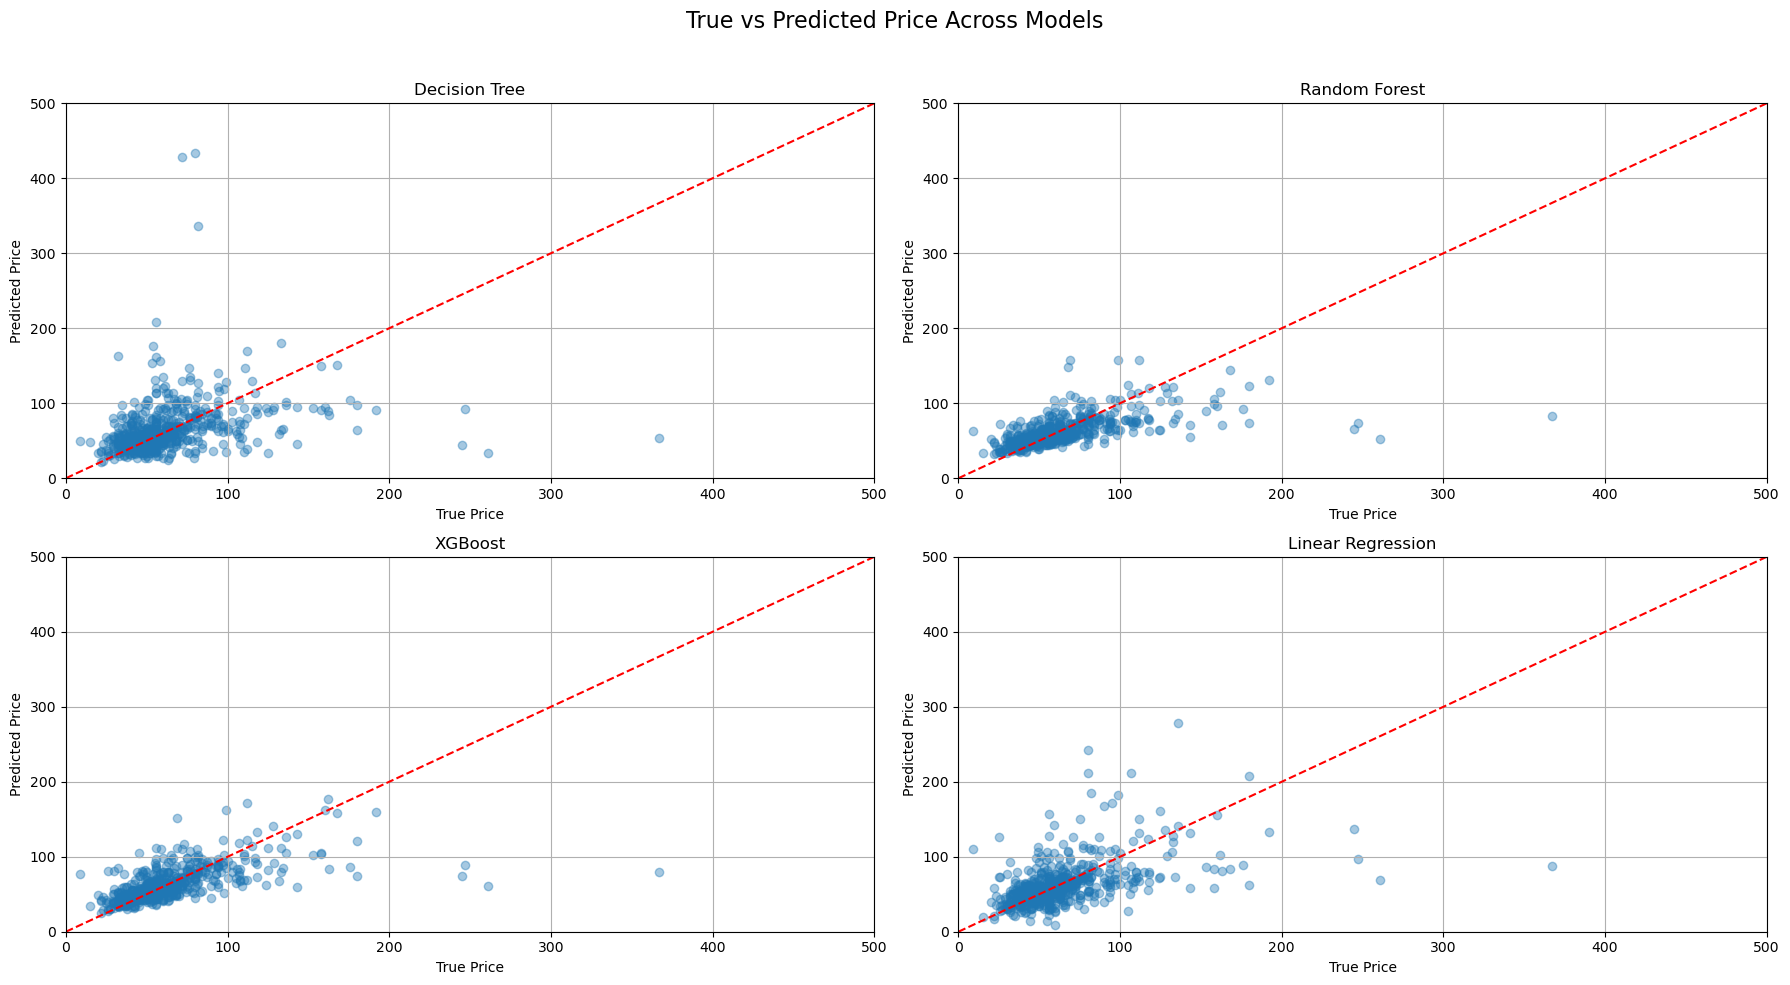


Modellvergleich (Default-Parameter):
              Modell    Log-R²   Log-MSE   Log-MAE  Log-MedAE  Preis-R²  \
0      Decision Tree -0.282908  0.262646  0.329289   0.225876 -0.845552   
1      Random Forest  0.403396  0.122141  0.219720   0.145739  0.107237   
2            XGBoost  0.423272  0.118072  0.217501   0.149984  0.147344   
3  Linear Regression -0.068908  0.218835  0.301735   0.197575 -1.190641   

      Preis-MSE  Preis-MAE  Preis-MedAE  
0   8897.263158  30.197368    12.000000  
1   4303.943074  18.190582     8.625312  
2   4110.585663  17.978930     8.371916  
3  10560.907882  27.795605    11.116829  


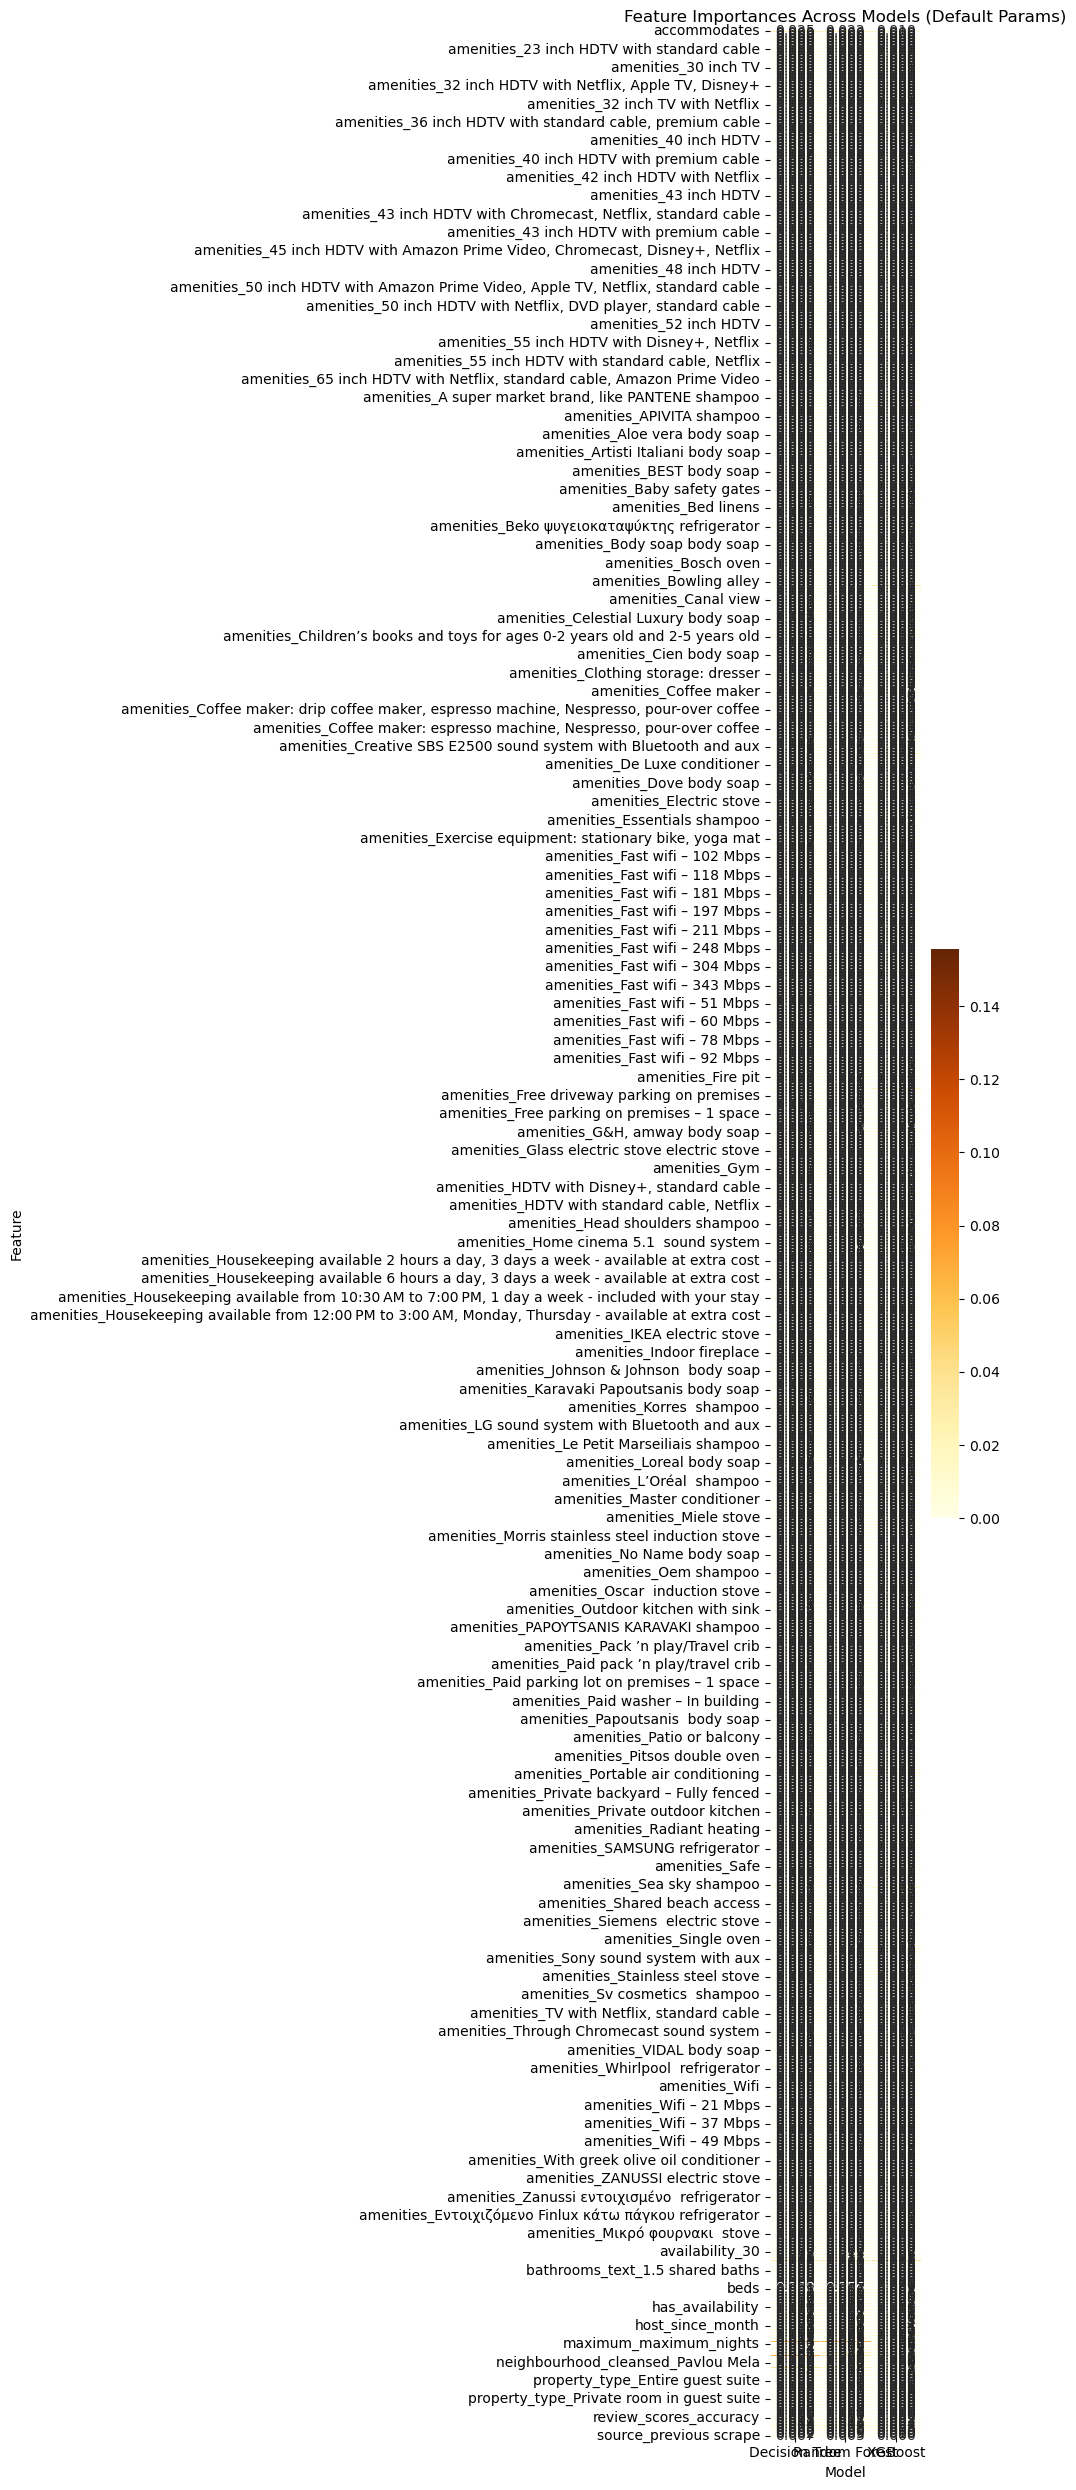

In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Modelle mit Default-Parametern
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=0),
    "Random Forest": RandomForestRegressor(random_state=0),
    "XGBoost": XGBRegressor(random_state=0, verbosity=0),
    "Linear Regression": LinearRegression()
}

results = []
feature_importances_all = []
plot_data = []

# Modelltraining und Bewertung
for name, model in models.items():
    print(f"\nModell: {name}")

    model.fit(X_train, y_train)
    y_pred_log = model.predict(X_test)

    # Metriken im Log-Raum
    mse_log = mean_squared_error(y_test, y_pred_log)
    r2_log = r2_score(y_test, y_pred_log)
    mae_log = mean_absolute_error(y_test, y_pred_log)
    medae_log = median_absolute_error(y_test, y_pred_log)

    # Rücktransformation in den Preisraum
    y_test_price = np.exp(y_test)
    y_pred_price = np.exp(y_pred_log)

    mse_price = mean_squared_error(y_test_price, y_pred_price)
    r2_price = r2_score(y_test_price, y_pred_price)
    mae_price = mean_absolute_error(y_test_price, y_pred_price)
    medae_price = median_absolute_error(y_test_price, y_pred_price)

    print(f"Log-R²: {r2_log:.4f} | Preis-R²: {r2_price:.4f}")
    print(f"Log-MAE: {mae_log:.4f} | Preis-MAE: {mae_price:.2f}")
    print(f"Log-MSE: {mse_log:.4f} | Preis-MSE: {mse_price:.2f}")

    results.append({
        "Modell": name,
        "Log-R²": r2_log,
        "Log-MSE": mse_log,
        "Log-MAE": mae_log,
        "Log-MedAE": medae_log,
        "Preis-R²": r2_price,
        "Preis-MSE": mse_price,
        "Preis-MAE": mae_price,
        "Preis-MedAE": medae_price
    })

    # Feature Importance speichern (nur für baumbasierte Modelle)
    if hasattr(model, "feature_importances_"):
        fi = pd.DataFrame({
            "Feature": X_train.columns,
            "Importance": model.feature_importances_,
            "Model": name
        })
        feature_importances_all.append(fi)

    # True-vs-Predicted-Daten für Sammelplot speichern
    plot_data.append((name, y_test_price, y_pred_price))

# -----------------------------
# Gemeinsamer Plot aller Modelle
fig, axs = plt.subplots(2, 2, figsize=(18, 10))
axs = axs.flatten()

for i, (name, y_true, y_pred) in enumerate(plot_data):
    ax = axs[i]
    ax.scatter(y_true, y_pred, alpha=0.4)
    ax.plot([0, 500], [0, 500], 'r--')
    ax.set_xlim(0, 500)
    ax.set_ylim(0, 500)
    ax.set_xlabel("True Price")
    ax.set_ylabel("Predicted Price")
    ax.set_title(name)
    ax.grid(True)

# Leere Achse ausblenden (falls < 6 Modelle)
for j in range(len(plot_data), len(axs)):
    fig.delaxes(axs[j])

plt.suptitle("True vs Predicted Price Across Models", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# -----------------------------
# Ergebnisse als DataFrame & CSV
results_df = pd.DataFrame(results)
print("\nModellvergleich (Default-Parameter):")
print(results_df)
results_df.to_csv("modellvergleich_default.csv", index=False)

# -----------------------------
# Feature Importances Heatmap
if feature_importances_all:
    all_importances = pd.concat(feature_importances_all)
    pivot = all_importances.pivot_table(index="Feature", columns="Model", values="Importance")
    plt.figure(figsize=(10, 25))
    sns.heatmap(pivot, cmap="YlOrBr", annot=True, fmt=".3f", linewidths=0.5)
    plt.title("Feature Importances Across Models (Default Params)")
    plt.tight_layout()
    plt.show()

# 1.1 plot learning curves

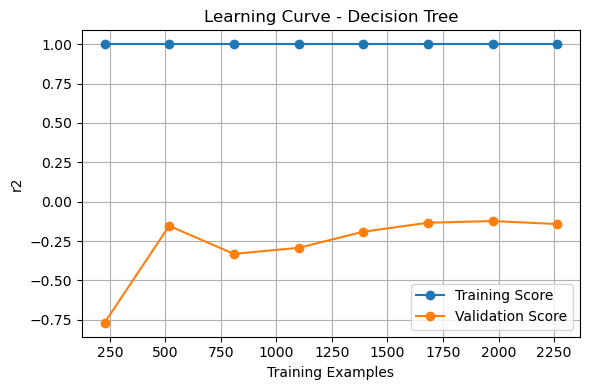

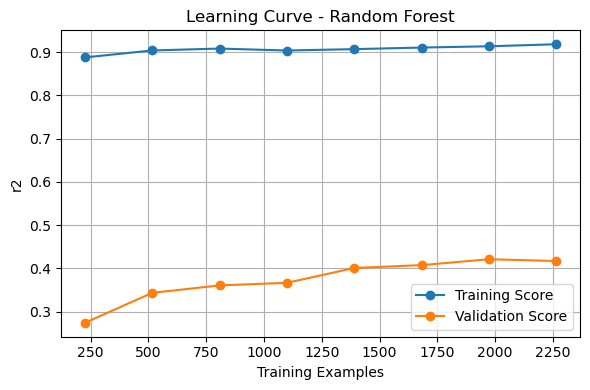

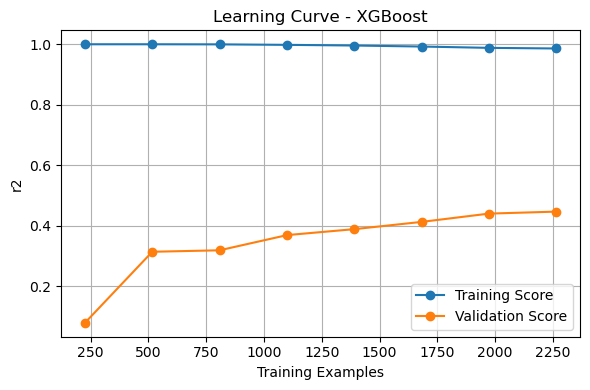

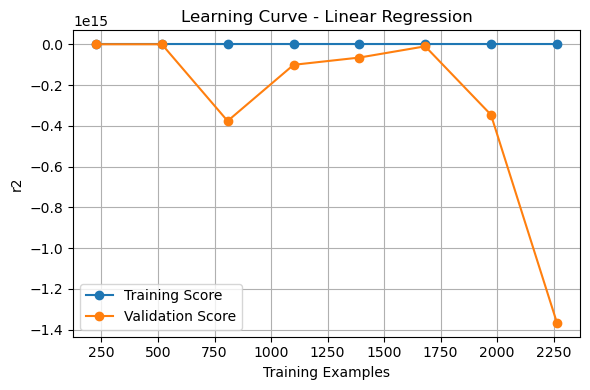

In [17]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X, y, name, scoring="r2"):
    train_sizes, train_scores, val_scores = learning_curve(
        model,
        X,
        y,
        cv=5,
        scoring=scoring,
        train_sizes=np.linspace(0.1, 1.0, 8),
        n_jobs=-1
    )
    train_mean = train_scores.mean(axis=1)
    val_mean = val_scores.mean(axis=1)

    plt.figure(figsize=(6, 4))
    plt.plot(train_sizes, train_mean, "o-", label="Training Score")
    plt.plot(train_sizes, val_mean, "o-", label="Validation Score")
    plt.title(f"Learning Curve - {name}")
    plt.xlabel("Training Examples")
    plt.ylabel(scoring)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# Learning Curves für alle Modelle (Default-Parameter)
for name, model in models.items():
    plot_learning_curve(model, X_train, y_train, name)

# 1.1 Features top 10

/var/folders/88/dgfdtb6n0l3_vyxycsf62vrc0000gn/T/ipykernel_32539/3224092195.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


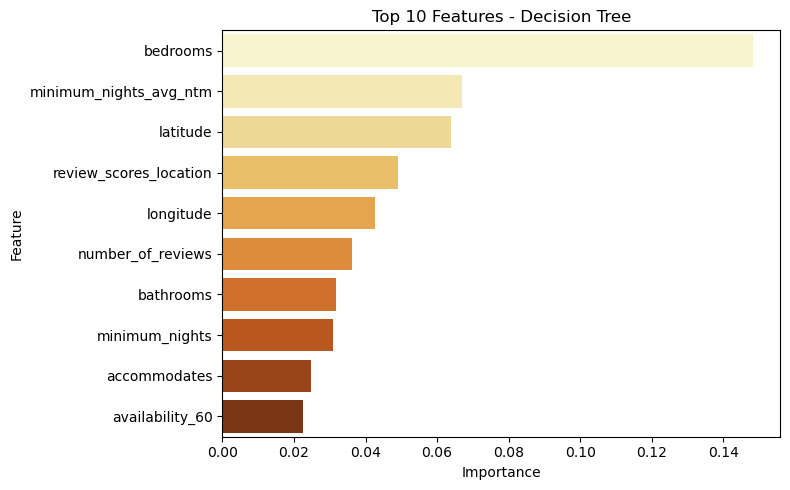

/var/folders/88/dgfdtb6n0l3_vyxycsf62vrc0000gn/T/ipykernel_32539/3224092195.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


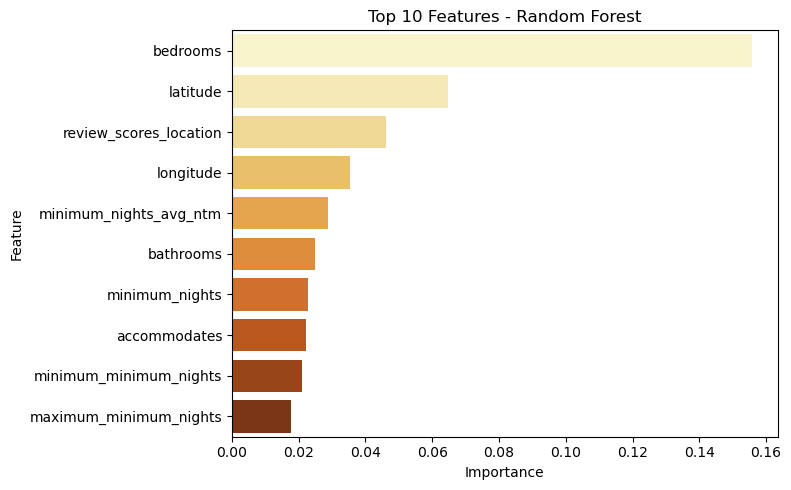

/var/folders/88/dgfdtb6n0l3_vyxycsf62vrc0000gn/T/ipykernel_32539/3224092195.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


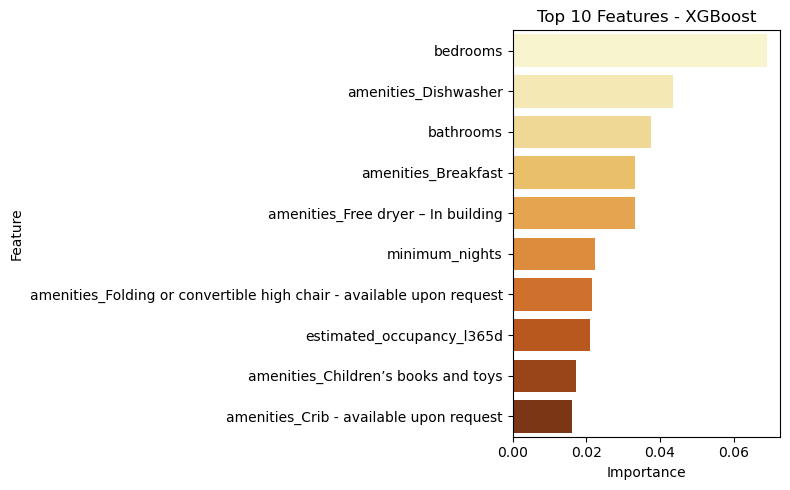

/var/folders/88/dgfdtb6n0l3_vyxycsf62vrc0000gn/T/ipykernel_32539/3224092195.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


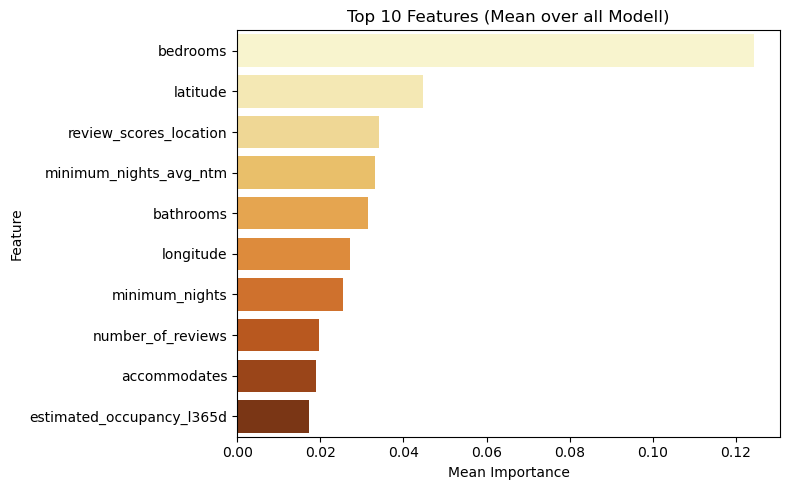

In [12]:
# -----------------------------
# Top-10 Features je Modell (Grafisch)
if feature_importances_all:
    for fi in feature_importances_all:
        model_name = fi["Model"].iloc[0]
        top_features = fi.sort_values("Importance", ascending=False).head(10)

        plt.figure(figsize=(8, 5))
        sns.barplot(
            x="Importance", y="Feature",
            data=top_features, palette="YlOrBr"
        )
        plt.title(f"Top 10 Features - {model_name}")
        plt.tight_layout()
        plt.show()

# -----------------------------
# Durchschnittliche Wichtigkeit über alle Modelle
if feature_importances_all:
    all_importances = pd.concat(feature_importances_all)
    mean_importances = (
        all_importances.groupby("Feature")["Importance"]
        .mean()
        .sort_values(ascending=False)
    )

    top_mean_features = mean_importances.head(10)

    plt.figure(figsize=(8, 5))
    sns.barplot(
        x=top_mean_features.values,
        y=top_mean_features.index,
        palette="YlOrBr"
    )
    plt.title("Top 10 Features (Mean over all Modell)")
    plt.xlabel("Mean Importance")
    plt.tight_layout()
    plt.show()

# 1.1 Testen mit den top 10 features neu trainieren

In [15]:
df_clean = pd.read_csv("MLreadydata.csv")
top10features = list(top_mean_features.index)
y = np.log(df_clean['price'])  # Zielvariable ist log(price)
X = df_clean.drop(columns=['price', 'estimated_revenue_l365d'])  # Features
X = X[top10features]

In [20]:
top10features

['bedrooms',
 'latitude',
 'longitude',
 'review_scores_location',
 'estimated_occupancy_l365d',
 'maximum_minimum_nights',
 'bathrooms',
 'accommodates',
 'source_city scrape',
 'minimum_nights_avg_ntm']

In [19]:
# Erst: Train + Temp (Test+Val)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42
)  # 70% Train, 30% Temp

# Danach: Temp in Validation + Test aufteilen
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)  # 15% Val, 15% Test


Modell: Decision Tree
Log-R²: -0.0716 | Preis-R²: -0.0045
Log-MAE: 0.3064 | Preis-MAE: 69.37
Log-MSE: 0.2825 | Preis-MSE: 943406.54


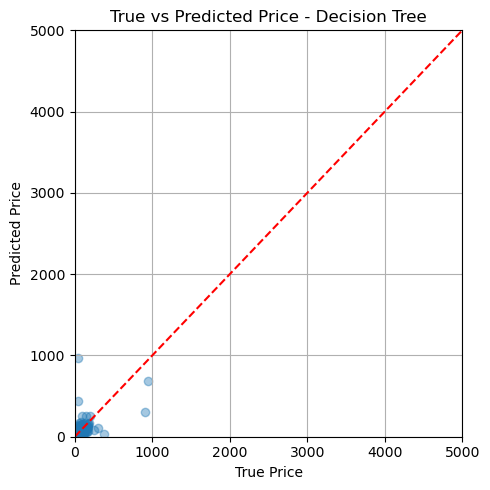


Modell: Random Forest
Log-R²: 0.2609 | Preis-R²: -0.0032
Log-MAE: 0.2355 | Preis-MAE: 64.01
Log-MSE: 0.1948 | Preis-MSE: 942159.49


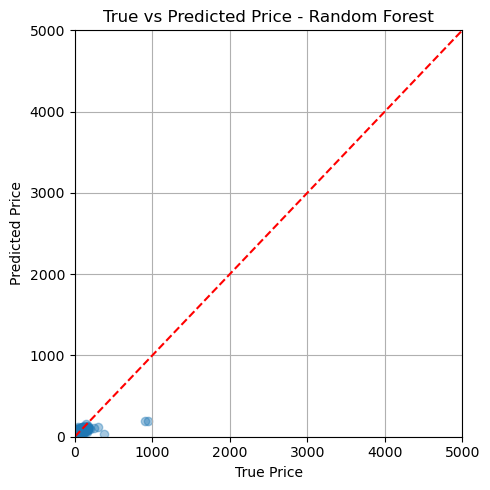


Modell: Gradient Boosting
Log-R²: 0.2980 | Preis-R²: -0.0013
Log-MAE: 0.2365 | Preis-MAE: 63.92
Log-MSE: 0.1851 | Preis-MSE: 940346.40


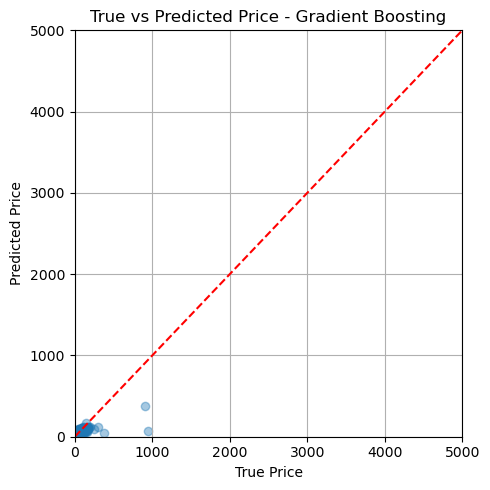


Modell: XGBoost
Log-R²: 0.2516 | Preis-R²: -0.0025
Log-MAE: 0.2447 | Preis-MAE: 64.86
Log-MSE: 0.1973 | Preis-MSE: 941529.36


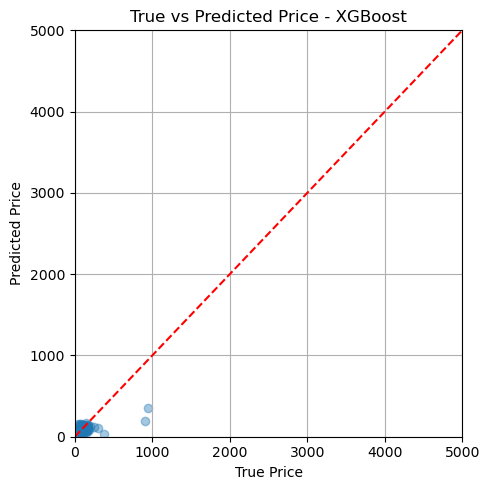


Modell: Linear Regression
Log-R²: 0.2513 | Preis-R²: 0.0020
Log-MAE: 0.2563 | Preis-MAE: 65.11
Log-MSE: 0.1974 | Preis-MSE: 937256.95


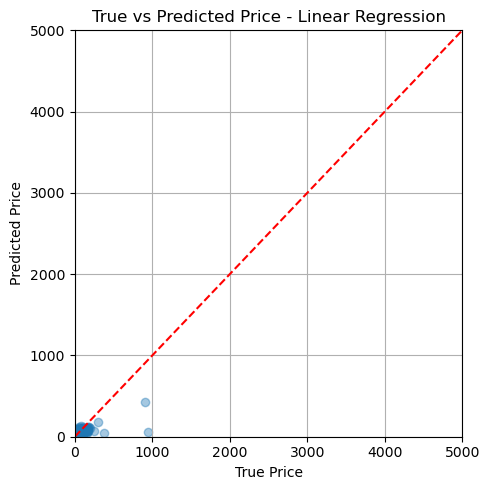


Modellvergleich (Default-Parameter):
              Modell    Log-R²   Log-MSE   Log-MAE  Log-MedAE  Preis-R²  \
0      Decision Tree -0.071625  0.282487  0.306409   0.206217 -0.004525   
1      Random Forest  0.260945  0.194819  0.235486   0.164461 -0.003198   
2  Gradient Boosting  0.298004  0.185050  0.236484   0.169136 -0.001267   
3            XGBoost  0.251641  0.197272  0.244675   0.168725 -0.002527   
4  Linear Regression  0.251271  0.197369  0.256327   0.182314  0.002023   

       Preis-MSE  Preis-MAE  Preis-MedAE  
0  943406.538696  69.374744    12.000000  
1  942159.485389  64.012290     8.871593  
2  940346.399474  63.915631     9.514486  
3  941529.362154  64.860845     9.494822  
4  937256.954851  65.113215    10.113623  


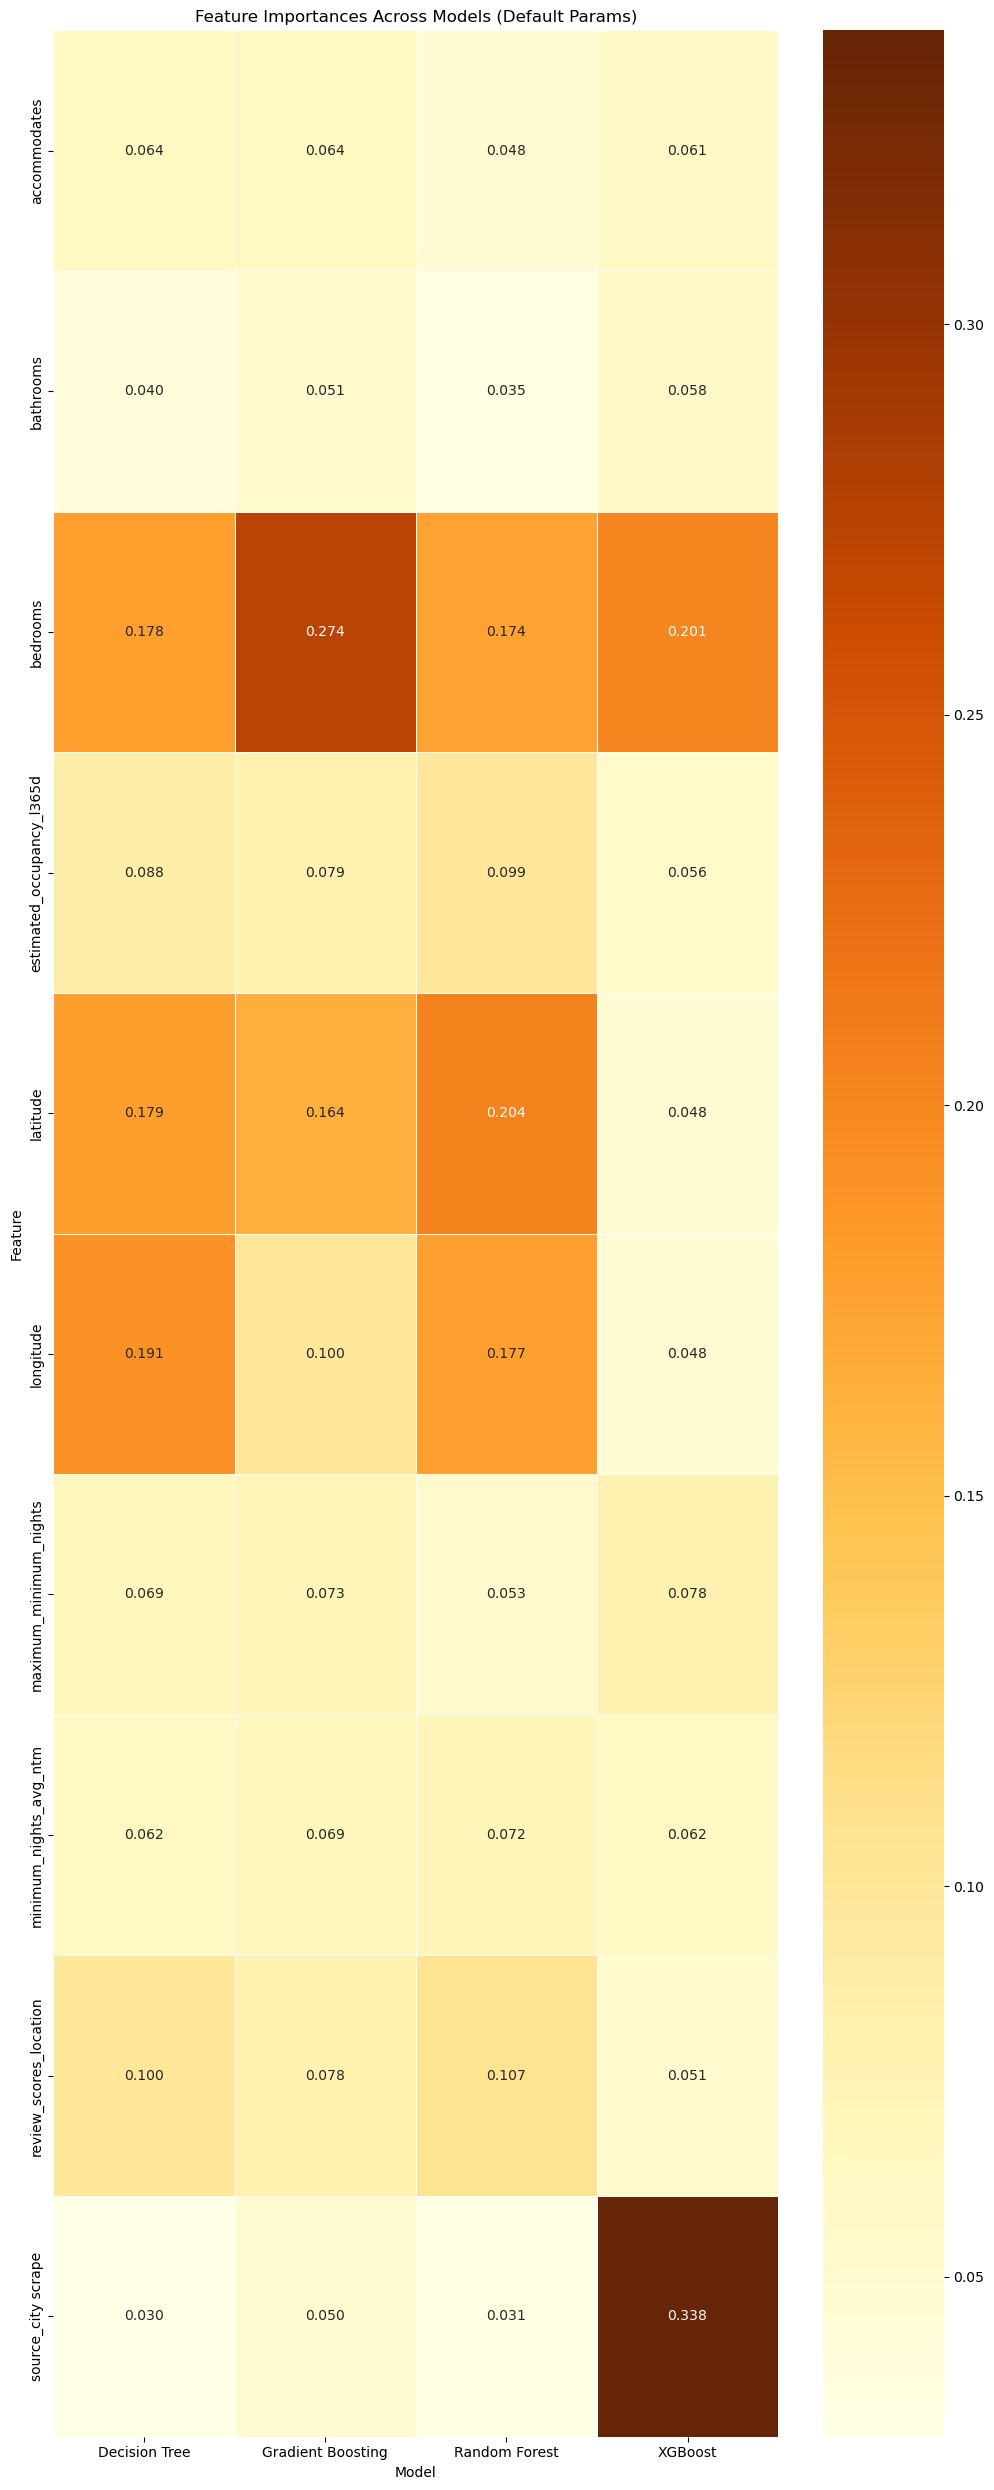

In [18]:
# Modelle nur mit Default-Parametern
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=0),
    "Random Forest": RandomForestRegressor(random_state=0),
    "Gradient Boosting": GradientBoostingRegressor(random_state=0),
    "XGBoost": XGBRegressor(random_state=0, verbosity=0),
    "Linear Regression": LinearRegression()
}

results = []
feature_importances_all = []

# Modelltraining und Bewertung
for name, model in models.items():
    print(f"\nModell: {name}")

    # Trainieren
    model.fit(X_train, y_train)

    # Vorhersage (im Log-Raum)
    y_pred_log = model.predict(X_test)

    # Metriken im Log-Raum
    mse_log = mean_squared_error(y_test, y_pred_log)
    r2_log = r2_score(y_test, y_pred_log)
    mae_log = mean_absolute_error(y_test, y_pred_log)
    medae_log = median_absolute_error(y_test, y_pred_log)

    # In Preisraum zurücktransformieren
    y_test_price = np.exp(y_test)
    y_pred_price = np.exp(y_pred_log)

    # Metriken im Preis-Raum
    mse_price = mean_squared_error(y_test_price, y_pred_price)
    r2_price = r2_score(y_test_price, y_pred_price)
    mae_price = mean_absolute_error(y_test_price, y_pred_price)
    medae_price = median_absolute_error(y_test_price, y_pred_price)

    print(f"Log-R²: {r2_log:.4f} | Preis-R²: {r2_price:.4f}")
    print(f"Log-MAE: {mae_log:.4f} | Preis-MAE: {mae_price:.2f}")
    print(f"Log-MSE: {mse_log:.4f} | Preis-MSE: {mse_price:.2f}")

    # Ergebnisse speichern
    results.append({
        "Modell": name,
        "Log-R²": r2_log,
        "Log-MSE": mse_log,
        "Log-MAE": mae_log,
        "Log-MedAE": medae_log,
        "Preis-R²": r2_price,
        "Preis-MSE": mse_price,
        "Preis-MAE": mae_price,
        "Preis-MedAE": medae_price
    })

    # Feature Importances (falls vorhanden)
    if hasattr(model, "feature_importances_"):
        fi = pd.DataFrame({
            "Feature": X_train.columns,
            "Importance": model.feature_importances_,
            "Model": name
        })
        feature_importances_all.append(fi)

    # Plot: True vs. Predicted (Preis-Raum)
    plt.figure(figsize=(5, 5))
    plt.scatter(y_test_price, y_pred_price, alpha=0.4)
    plt.plot([0, 5000], [0, 5000], 'r--')  # Diagonale Referenzlinie
    plt.xlim(0, 5000)
    plt.ylim(0, 5000)
    plt.xlabel("True Price")
    plt.ylabel("Predicted Price")
    plt.title(f"True vs Predicted Price - {name}")
    plt.grid()
    plt.tight_layout()
    plt.show()

# -----------------------------
# Gesamtergebnis
results_df = pd.DataFrame(results)
print("\nModellvergleich (Default-Parameter):")
print(results_df)

# Als CSV speichern
results_df.to_csv("modellvergleich_default.csv", index=False)

# -----------------------------
# Feature Importances als Heatmap
if feature_importances_all:
    all_importances = pd.concat(feature_importances_all)
    pivot = all_importances.pivot_table(index="Feature", columns="Model", values="Importance")
    plt.figure(figsize=(10, 25))
    sns.heatmap(pivot, cmap="YlOrBr", annot=True, fmt=".3f", linewidths=0.5)
    plt.title("Feature Importances Across Models (Default Params)")
    plt.tight_layout()
    plt.show()